In [1]:
%matplotlib notebook
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.pipeline import Pipeline
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:
os.chdir("C:\\Users\\Wojcz\\PycharmProjects\\scrapyta\\scrapyta\\tennis-atp-100-singles\\")
dataframe=pd.DataFrame()
for file in os.listdir():
	df=pd.read_csv("C:\\Users\\Wojcz\\PycharmProjects\\scrapyta\\scrapyta\\tennis-atp-100-singles\\{}".format(file),
		names=[i for i in range(400)],
		engine="python")
	dataframe=dataframe.append(df)
dataframe=dataframe.drop(labels=dataframe.columns[12:],axis=1)
dataframe=dataframe.drop_duplicates(0)
dataframe=dataframe.set_index(keys=pd.Index([i for i in range(dataframe.shape[0])]))
dataframe=dataframe.drop(labels=np.where(dataframe.iloc[:,11] == "-")[0][0],axis=0)
dataframe.iloc[:,11]=dataframe.iloc[:,11].astype(float)
dataframe.head()




,0,1,2,3,4,5,6,7,8,9,10,11
0,1168090971,Vilella M. M.,Andreozzi G.,13.09.2018 13:05,4.0,6.0,3.0,6.0,NaN,NaN,2.65,1.42
1,-803211511,Davidovich Fokina A.,Andreozzi G.,16.09.2018 12:10,4.0,6.0,6.0,4.0,3.0,6.0,2.32,1.55
2,-1535910362,Andreozzi G.,Cuevas M.,09.10.2018 17:10,6.0,7.0,6.0,2.0,6.0,3.0,1.37,2.85
3,-793910428,Andreozzi G.,Serdarusic N.,11.10.2018 16:10,6.0,7.0,4.0,6.0,NaN,NaN,1.27,3.40
4,-1226255578,Andreozzi G.,Dutra Da Silva R.,23.10.2018 17:40,4.0,6.0,6.0,1.0,1.0,0.0,1.60,2.19


In [3]:
dataframe.shape

(3681, 12)

In [4]:
dataframe.isnull().sum()

0        0
1        0
2        0
3        0
4       31
5       31
6       66
7       66
8     2339
9     2339
10       0
11       0
dtype: int64

In [3]:
dataframe=dataframe.dropna(axis=0,subset=[4,5])

In [4]:
second_set_more_gems = np.where(dataframe.iloc[:,[4,5]].sum(axis=1)
                                < dataframe.iloc[:,[6,7]].sum(axis=1),1,0)
lamak = np.where(((dataframe.iloc[:,4] > dataframe.iloc[:,5]) 
                 & (dataframe.iloc[:,7] > dataframe.iloc[:,6])) | 
                ((dataframe.iloc[:,4] < dataframe.iloc[:,5]) 
                 & (dataframe.iloc[:,7] < dataframe.iloc[:,6])),1,0)
three_sets = np.where(dataframe.iloc[:,8] == dataframe.iloc[:,8],1,0)
ssmg_high_odd = np.where(((dataframe.iloc[:,10] > dataframe.iloc[:,11]) & 
                         (dataframe.iloc[:,4] < dataframe.iloc[:,6])) | 
                        ((dataframe.iloc[:,10] < dataframe.iloc[:,11]) & 
                         (dataframe.iloc[:,5] < dataframe.iloc[:,7])),1,0)
ssmg_low_odd = np.where(((dataframe.iloc[:,10] > dataframe.iloc[:,11]) & 
                         (dataframe.iloc[:,5] < dataframe.iloc[:,7])) | 
                        ((dataframe.iloc[:,10] < dataframe.iloc[:,11]) & 
                         (dataframe.iloc[:,4] < dataframe.iloc[:,6])),1,0)
                        

print("TARGETS RATIO")
print("second_set_more_gems",np.unique(second_set_more_gems,return_counts=True)[1][1]
      /dataframe.shape[0])
print("lamak",np.unique(lamak,return_counts=True)[1][1]/dataframe.shape[0])
print("three_sets",np.unique(three_sets,return_counts=True)[1][1]/dataframe.shape[0])
print("ssmg_low_odd",np.unique(ssmg_low_odd,return_counts=True)[1][1]/dataframe.shape[0])
print("ssmg_high_odd",np.unique(ssmg_high_odd,return_counts=True)[1][1]/dataframe.shape[0])





TARGETS RATIO
second_set_more_gems 0.3789041095890411
lamak 0.33123287671232876
three_sets 0.36767123287671233
ssmg_low_odd 0.24767123287671233
ssmg_high_odd 0.36712328767123287


In [5]:
df=dataframe.iloc[:,[4,5,10,11]]
X_train,X_test,y_train,y_test=train_test_split(df,second_set_more_gems,test_size=0.25,
                                               stratify=second_set_more_gems)


In [86]:
test_tree=RandomForestClassifier(n_estimators=400)
test_tree.fit(X_train,y_train)
test_tree.feature_importances_

array([0.15630093, 0.19107481, 0.3234005 , 0.32922376])

In [6]:
sc=StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
test_pca = PCA()
test_pca.fit(X_train_std)
nvar = test_pca.explained_variance_ratio_
nvar = list(nvar)
nvar.sort(reverse=True)
for i in range(1,len(nvar)+1):
	print(sum(nvar[:i]))



0.4927300694868255
0.7083491538171197
0.8689965134231146
1.0


<IPython.core.display.Javascript object>


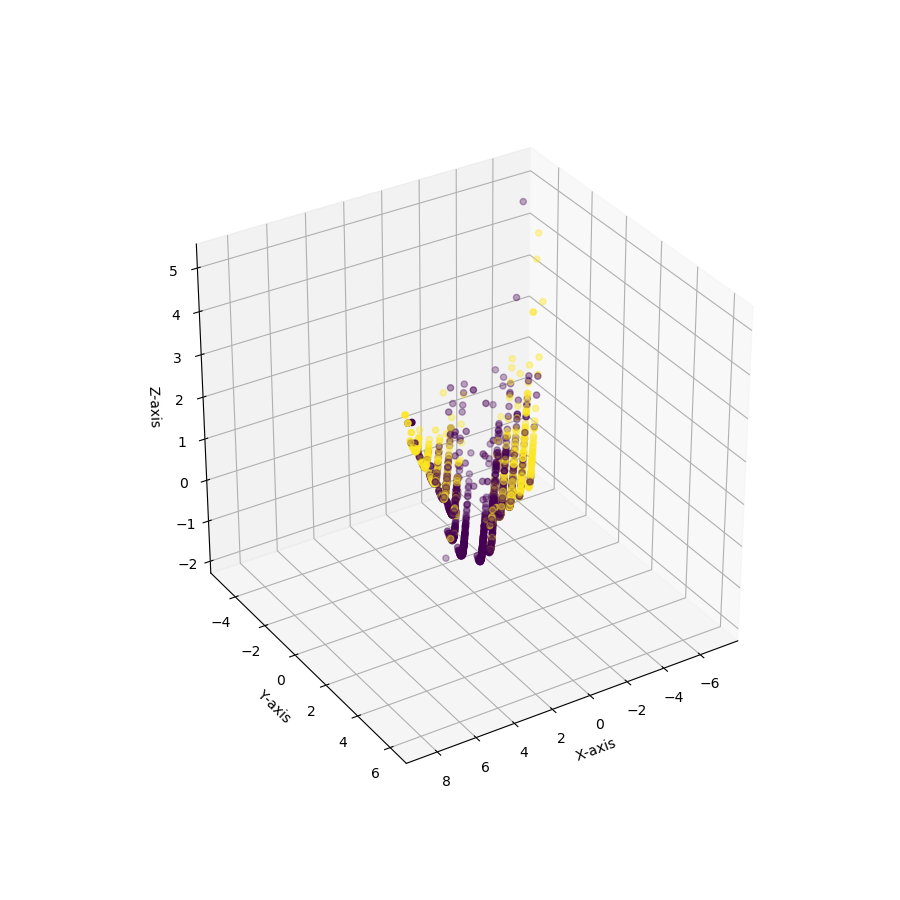

In [13]:
pca_3d = PCA(n_components=3)
X_train_std_pca3d = pca_3d.fit_transform(X_train_std)
xplt = X_train_std_pca3d
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xplt[:,0],xplt[:,1],xplt[:,2],c=y_train)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()


In [14]:
test_tree=RandomForestClassifier(n_estimators=400)
test_tree.fit(X_train_std_pca3d,y_train)
test_tree.feature_importances_

array([0.29776852, 0.28914247, 0.41308901])

In [31]:
test_kpca = KernelPCA(kernel="rbf")
test_kpca.fit(X_train_std)
nvar1 = test_kpca.lambdas_
nvar1 = list(nvar1)
nvar1.sort(reverse=True)
test_kpca = KernelPCA(kernel="sigmoid")
test_kpca.fit(X_train_std)
nvar2 = test_kpca.lambdas_
nvar2 = list(nvar2)
nvar2.sort(reverse=True)
test_kpca = KernelPCA(kernel="poly")
test_kpca.fit(X_train_std)
nvar3 = test_kpca.lambdas_
nvar3 = list(nvar3)
nvar3.sort(reverse=True)
for i in range(1,len(nvar1)+1):
	print(sum(nvar1[:i]),'\t',sum(nvar2[:i]),'\t',sum(nvar3[:i]))
    


500.76869543309476 	 565.0233585492792 	 234363.74397165645
799.7694566800723 	 770.7397111054496 	 310775.64934696327
989.1242167688621 	 910.6799490446269 	 317184.73714474257
1171.0480513118582 	 937.073225892046 	 321778.4402453666
1263.5620187656987 	 959.2174895423867 	 324408.9743220954
1346.0035441599703 	 969.1821659301986 	 326690.71023494314
1413.5207242147885 	 978.0135890056404 	 328763.4906215437
1475.0399764399037 	 984.4315012614389 	 330331.72653772956
1516.4563841962301 	 989.7318939562759 	 330973.72000826325
1552.7248595851847 	 994.5755772597627 	 331559.26387649204
1577.8821639376258 	 998.0309472897769 	 332043.5892384129
1601.7096187552224 	 1000.4799508662975 	 332439.73044024466
1621.9553680132328 	 1002.6338873363147 	 332745.9603125104
1639.8460383734623 	 1004.3416283824791 	 333024.1632323793
1653.8144856391912 	 1005.9609050390715 	 333249.0336601029
1666.0083723969342 	 1007.3527819380066 	 333383.24809074774
1677.227325031375 	 1008.6181324517752 	 3334

1798.2116443848245 	 1018.1071826485722 	 333844.45450673153
1798.2116464281644 	 1018.1071826486428 	 333844.45450673153
1798.2116483826192 	 1018.1071826487125 	 333844.45450673153
1798.2116502006684 	 1018.1071826487724 	 333844.45450673153
1798.2116519481647 	 1018.1071826488308 	 333844.45450673153
1798.2116536694475 	 1018.1071826488871 	 333844.45450673153
1798.2116551219492 	 1018.1071826489356 	 333844.45450673153
1798.211656499735 	 1018.1071826489806 	 333844.45450673153
1798.2116578671307 	 1018.1071826490224 	 333844.45450673153
1798.2116591613221 	 1018.1071826490618 	 333844.45450673153
1798.2116604328523 	 1018.1071826490992 	 333844.45450673153
1798.2116615712312 	 1018.1071826491348 	 333844.45450673153
1798.211662671722 	 1018.1071826491674 	 333844.45450673153
1798.2116637407794 	 1018.1071826491977 	 333844.45450673153
1798.2116647728867 	 1018.1071826492255 	 333844.45450673153
1798.2116657385466 	 1018.1071826492525 	 333844.45450673153
1798.2116666606876 	 1018.

1798.211684622402 	 1018.1071826495969 	 333844.45450673153
1798.211684622482 	 1018.1071826495969 	 333844.45450673153
1798.211684622561 	 1018.1071826495969 	 333844.45450673153
1798.2116846226354 	 1018.1071826495969 	 333844.45450673153
1798.2116846227057 	 1018.1071826495969 	 333844.45450673153
1798.2116846227718 	 1018.1071826495969 	 333844.45450673153
1798.2116846228369 	 1018.1071826495969 	 333844.45450673153
1798.211684622898 	 1018.1071826495969 	 333844.45450673153
1798.2116846229558 	 1018.1071826495969 	 333844.45450673153
1798.2116846230097 	 1018.1071826495969 	 333844.45450673153
1798.211684623062 	 1018.1071826495969 	 333844.45450673153
1798.2116846231113 	 1018.1071826495969 	 333844.45450673153
1798.2116846231584 	 1018.1071826495969 	 333844.45450673153
1798.2116846232038 	 1018.1071826495969 	 333844.45450673153
1798.211684623248 	 1018.1071826495969 	 333844.45450673153
1798.2116846232898 	 1018.1071826495969 	 333844.45450673153
1798.2116846233307 	 1018.1071

1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	

1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	

1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	

1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	

1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	

1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	

1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	

1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	

1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	

1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	 333844.45450673153
1798.211684624174 	 1018.1071826495969 	

<IPython.core.display.Javascript object>


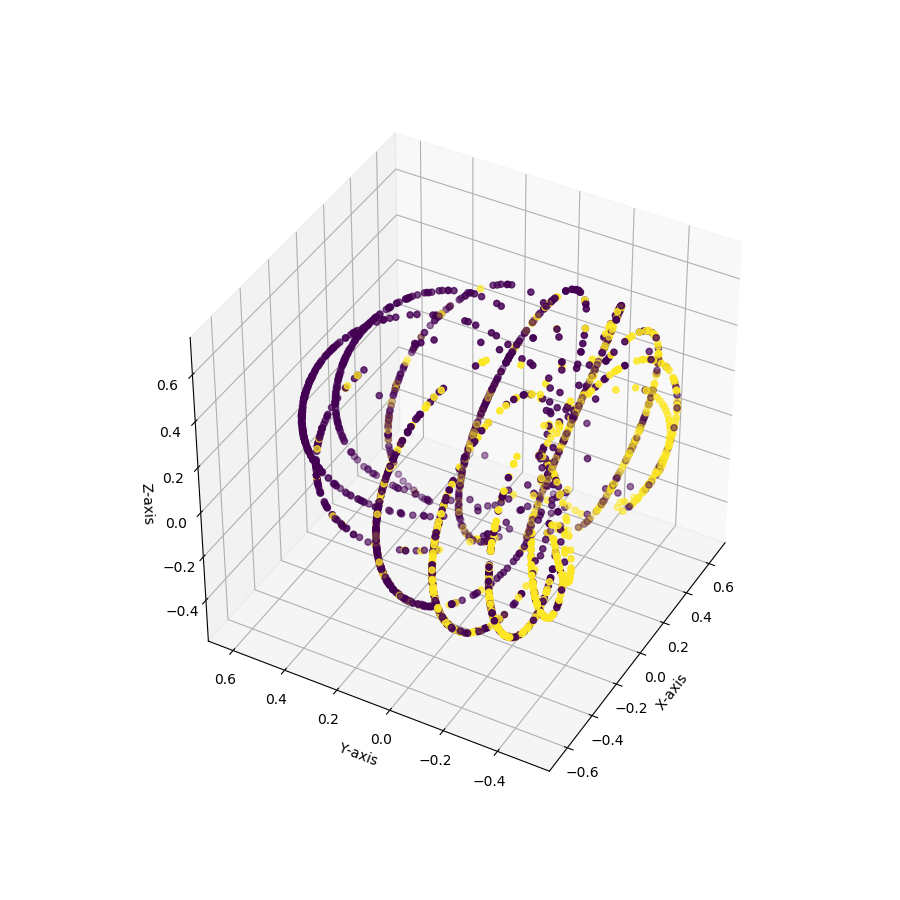

In [33]:
kpca_3d = KernelPCA(kernel="rbf",n_components=3)
X_train_std_kpca3d = kpca_3d.fit_transform(X_train_std)
xplt = X_train_std_kpca3d
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xplt[:,0],xplt[:,1],xplt[:,2],c=y_train)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()


<IPython.core.display.Javascript object>


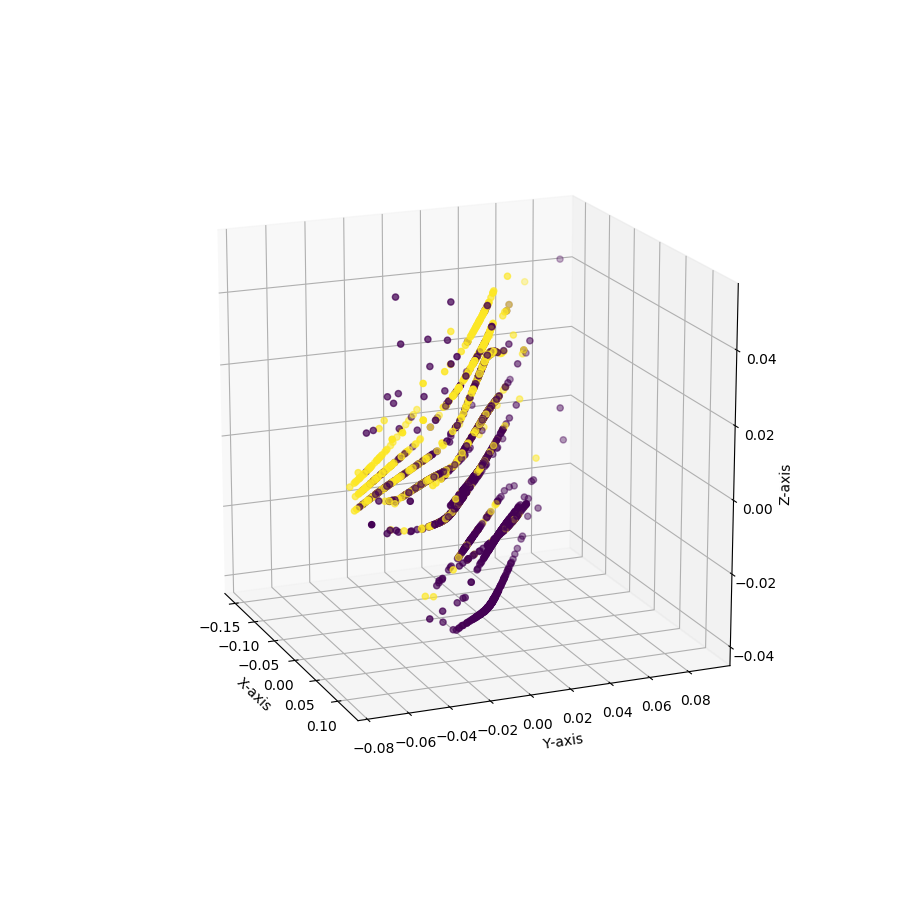

In [41]:

lle = LocallyLinearEmbedding(n_components=3,n_neighbors=20)
x_train_std_lle = lle.fit_transform(X_train_std)
xplt = x_train_std_lle
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xplt[:,0],xplt[:,1],xplt[:,2],c=y_train)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()


In [44]:
paramgrid_forest={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [40,50,80,100,150,200,300,400]}
grid_forest_std=GridSearchCV(RandomForestClassifier(),param_grid=paramgrid_forest,cv=10)
grid_forest_std.fit(X_train_std,y_train)
print("BEST SCORE",grid_forest_std.best_score_)
print("BEST PARAMS",grid_forest_std.best_params_)

BEST SCORE 0.7351114358786993


AttributeError: 'GridSearchCV' object has no attribute 'best_PARAMS_'

In [45]:
grid_forest_std.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 40}

In [9]:
pca_3d = PCA(n_components=3)
X_train_std_pca3d = pca_3d.fit_transform(X_train_std)
paramgrid_forest={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [40,50,80,100,150,200,300,400]}
grid_forest_pca3d=GridSearchCV(RandomForestClassifier(),param_grid=paramgrid_forest,cv=10)
grid_forest_pca3d.fit(X_train_std_pca3d,y_train)
print("BEST SCORE",grid_forest_pca3d.best_score_)
print("BEST PARAMS",grid_forest_pca3d.best_params_)

BEST SCORE 0.7373036170990135
BEST PARAMS {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}


In [10]:
kpca_3d = KernelPCA(kernel="rbf",n_components=3)
X_train_std_kpca3d = kpca_3d.fit_transform(X_train_std)
paramgrid_forest={'bootstrap': [True, False],
 'max_depth': [2,4,6,10, 20,50,None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [ 2, 4,8,14,25],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [40,50,80,100,150,200,300,400]}
grid_forest_kpca3d=GridSearchCV(RandomForestClassifier(),param_grid=paramgrid_forest,cv=10,n_jobs=2)
grid_forest_kpca3d.fit(X_train_std_kpca3d,y_train)
print("BEST SCORE",grid_forest_kpca3d.best_score_)
print("BEST PARAMS",grid_forest_kpca3d.best_params_)

BEST SCORE 0.7365728900255755
BEST PARAMS {'bootstrap': True, 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [8]:
lle = LocallyLinearEmbedding(n_components=3,n_neighbors=20)
x_train_std_lle = lle.fit_transform(X_train_std)
paramgrid_forest={'bootstrap': [True, False],
 'max_depth': [2,5,10,50,100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50,150,400]}
grid_forest_lle=GridSearchCV(RandomForestClassifier(),param_grid=paramgrid_forest,cv=10,n_jobs=2)
grid_forest_lle.fit(x_train_std_lle,y_train)
print("BEST SCORE",grid_forest_lle.best_score_)
print("BEST PARAMS",grid_forest_lle.best_params_)

BEST SCORE 0.7387650712458896
BEST PARAMS {'bootstrap': True, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [13]:
accuracy_score(y_train,
               cross_val_predict(grid_forest_lle.best_estimator_,x_train_std_lle,y_train,cv=8))

0.7387650712458896

In [14]:
confusion_matrix(y_train,grid_forest_lle.best_estimator_.predict(x_train_std_lle))

array([[1389,  311],
       [ 339,  698]], dtype=int64)

In [7]:
paramgrid_svc_std=[{"kernel":["rbf"],
"C":[0.00001,0.01,10,100],
"gamma":[0.00001,0.001,0.1,10]},
{"kernel":["poly"],
"gamma":[0.00001,0.0001,0.001,0.01,0.1,1,10],
"C":[0.00001,0.01,10,100],
"degree":[2,3]},
{"kernel":["linear"],
"C":[0.00001,0.01,10,100],
}]
grid_svc_std=GridSearchCV(SVC(max_iter=1000),param_grid=paramgrid_svc_std,cv=10,n_jobs=2)
grid_svc_std.fit(X_train_std,y_train)
print("BEST SCORE",grid_svc_std.best_score_)
print("BEST PARAMS",grid_svc_std.best_params_)

BEST SCORE 0.7493606138107417
BEST PARAMS {'C': 0.01, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}


c:\users\wojcz\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [9]:
pca_3d = PCA(n_components=3)
X_train_std_pca3d = pca_3d.fit_transform(X_train_std)
paramgrid_svc_std=[{"kernel":["rbf"],
"C":[0.00001,0.01,10,100],
"gamma":[0.00001,0.001,0.1,10]},
{"kernel":["poly"],
"gamma":[0.00001,0.0001,0.001,0.01,0.1,1,10],
"C":[0.00001,0.01,10,100],
"degree":[2,3]},
{"kernel":["linear"],
"C":[0.00001,0.01,10,100],
}]
grid_svc_std_pca3d=GridSearchCV(SVC(max_iter=1000),param_grid=paramgrid_svc_std,cv=10,n_jobs=2)
grid_svc_std_pca3d.fit(X_train_std_pca3d,y_train)
print("BEST SCORE",grid_svc_std_pca3d.best_score_)
print("BEST PARAMS",grid_svc_std_pca3d.best_params_)

BEST SCORE 0.7511874314943369
BEST PARAMS {'C': 0.01, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}


c:\users\wojcz\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [11]:
kpca_3d = KernelPCA(kernel="sigmoid",n_components=3)
X_train_std_kpca3d = kpca_3d.fit_transform(X_train_std)
paramgrid_svc_std=[{"kernel":["rbf"],
"C":[0.00001,0.01,10,100],
"gamma":[0.00001,0.001,0.1,10]},
{"kernel":["poly"],
"gamma":[0.00001,0.0001,0.001,0.01,0.1,1,10],
"C":[0.00001,0.01,10,100],
"degree":[2,3]},
{"kernel":["linear"],
"C":[0.00001,0.01,10,100],
}]
grid_svc_std_kpca3d=GridSearchCV(SVC(max_iter=1000),param_grid=paramgrid_svc_std,cv=10,n_jobs=2)
grid_svc_std_kpca3d.fit(X_train_std_kpca3d,y_train)
print("BEST SCORE",grid_svc_std_kpca3d.best_score_)
print("BEST PARAMS",grid_svc_std_kpca3d.best_params_)

BEST SCORE 0.7515527950310559
BEST PARAMS {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


c:\users\wojcz\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [18]:
lle = LocallyLinearEmbedding(n_components=3,n_neighbors=20)
x_train_std_lle = lle.fit_transform(X_train_std)
paramgrid_svc_std=[{"kernel":["rbf"],
"C":[300,500,1000],
"gamma":[0.1,10,40,80,300]},
{"kernel":["poly"],
"gamma":[0.00001,0.0001,0.001,0.01,0.1,1,10],
"C":[0.00001,0.01,10,100],
"degree":[2,3]},
{"kernel":["linear"],
"C":[0.00001,0.01,10,100],
}]
grid_svc_std_lle=GridSearchCV(SVC(),param_grid=paramgrid_svc_std,cv=10,n_jobs=2)
grid_svc_std_lle.fit(x_train_std_lle,y_train)
print("BEST SCORE",grid_svc_std_lle.best_score_)
print("BEST PARAMS",grid_svc_std_lle.best_params_)

BEST SCORE 0.7478991596638656
BEST PARAMS {'C': 1000, 'gamma': 80, 'kernel': 'rbf'}


In [22]:
df2=dataframe.iloc[:,[4,5,10,11]]
df2.loc[:,4] = (df2.loc[:,4])*100

df2 = df2.drop(11,axis=1)


df2.head()

c:\users\wojcz\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,4,5,10
0,400.0,6.0,2.65
1,400.0,6.0,2.32
2,600.0,7.0,1.37
3,600.0,7.0,1.27
4,400.0,6.0,1.60


In [23]:
X_train2,X_test2,y_train2,y_test2=train_test_split(df2,second_set_more_gems,test_size=0.25,
                                               stratify=second_set_more_gems)


In [24]:
sc2=StandardScaler()
X_train_std2 = sc2.fit_transform(X_train2)
X_test_std2 = sc2.transform(X_test2)
test_pca = PCA()
test_pca.fit(X_train_std2)
nvar = test_pca.explained_variance_ratio_
nvar = list(nvar)
nvar.sort(reverse=True)
for i in range(1,len(nvar)+1):
	print(sum(nvar[:i]))

0.5506770665182359
0.8050795404843354
1.0


<IPython.core.display.Javascript object>


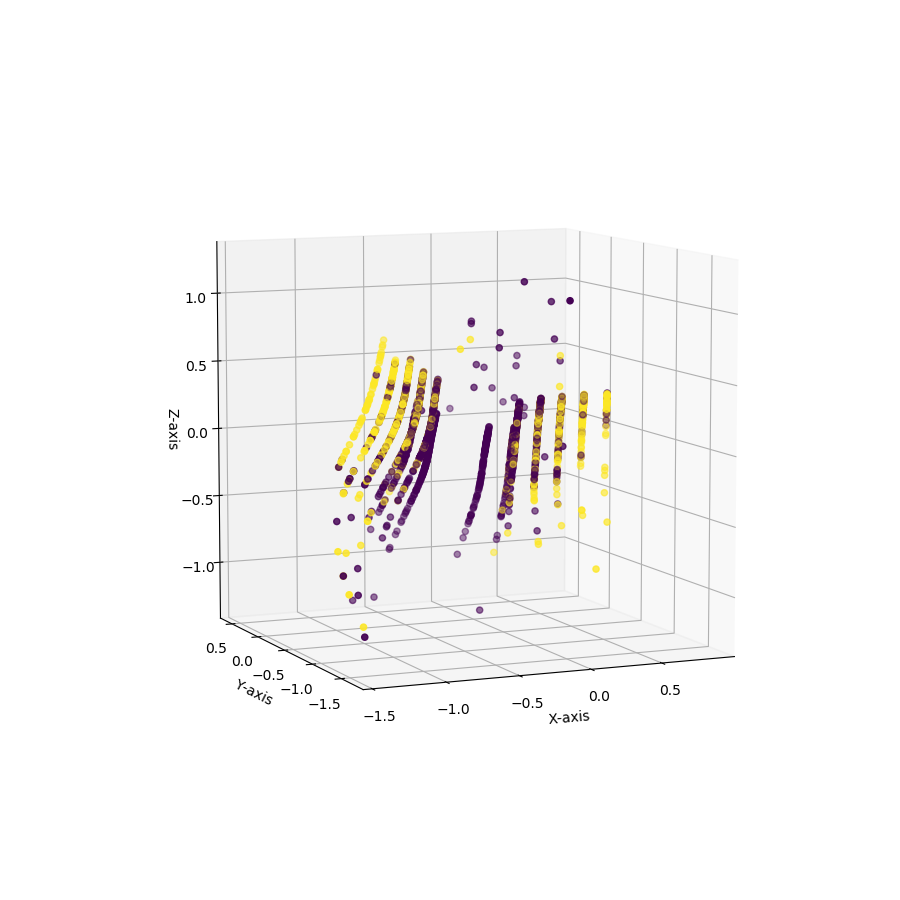

In [26]:
kpca_3d2 = KernelPCA(kernel="sigmoid",n_components=3)
X_train_std_kpca3d2 = kpca_3d2.fit_transform(X_train_std2)
xplt = X_train_std_kpca3d2
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xplt[:,0],xplt[:,1],xplt[:,2],c=y_train2)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()

<IPython.core.display.Javascript object>


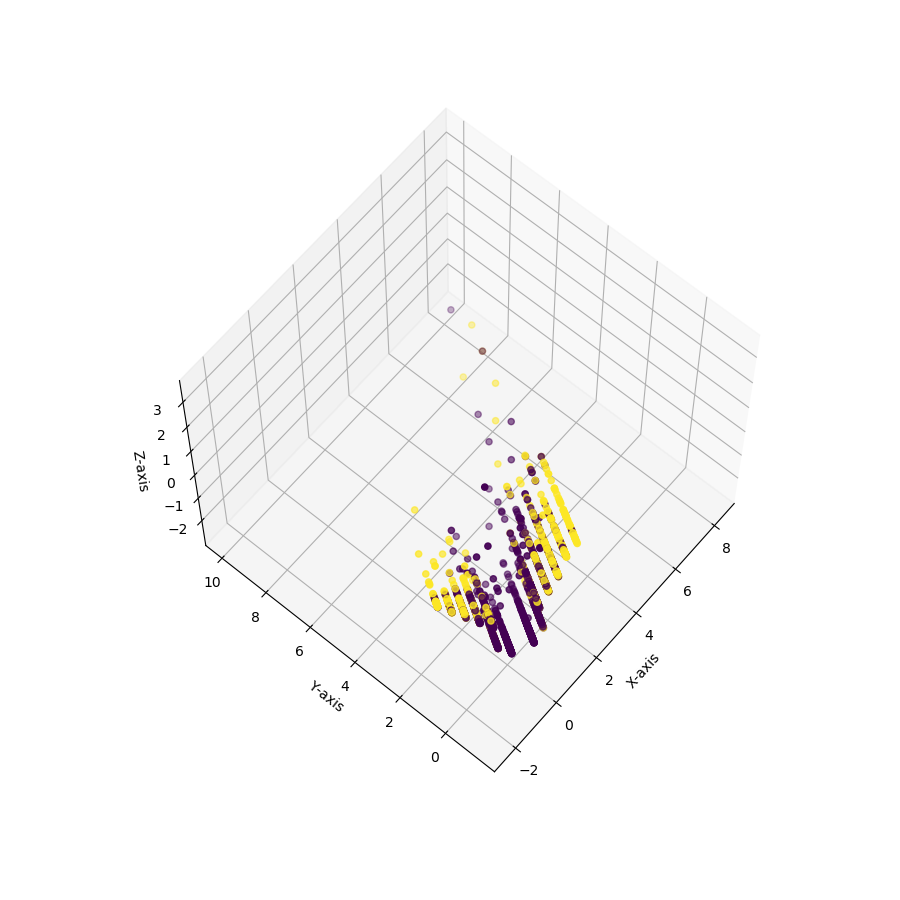

In [27]:
pca_3d2 = PCA(n_components=3)
X_train_std_pca3d2 = pca_3d2.fit_transform(X_train_std2)
xplt = X_train_std_pca3d2
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xplt[:,0],xplt[:,1],xplt[:,2],c=y_train2)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()